## MANNING PROJECTS - Demographic Data Analysis
Part 3 - Visualizing relationships

In [33]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Data visualizations

In [2]:
folder_path = r'C:\Users\igord\Projects\Manning\Life_exp\csv\output'

separator = '\\'

file_list = os.listdir(folder_path)

In [3]:
file_list

['Area.csv',
 'Crime.csv',
 'Edu.csv',
 'Income.csv',
 'Life_Exp.csv',
 'Region.csv']

Custom service functions

In [4]:
area = pd.read_csv(folder_path + separator + file_list[0])

In [5]:
crime = pd.read_csv(folder_path + separator + file_list[1])

In [6]:
edu = pd.read_csv(folder_path + separator + file_list[2])

In [7]:
income = pd.read_csv(folder_path + separator + file_list[3])

In [8]:
life = pd.read_csv(folder_path + separator + file_list[4])

In [9]:
region = pd.read_csv(folder_path + separator + file_list[5])

#### Merging all together

In [10]:
total = area.merge(crime, how = 'inner')

In [11]:
total = total.merge(edu, how = 'inner')

In [12]:
total = total.merge(income, how = 'inner')

In [13]:
total = total.merge(life, how = 'inner')

In [14]:
total = total.merge(region, how = 'inner')

In [15]:
total.head(2)

,State,TotalRank,TotalSqMi,TotalKmQ,LandRank,LandSqMi,LandKmQ,LandPer,WaterRank,WaterSqMi,...,Income2009,Income2008,Income2007,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division
0,Alabama,30,52420.07,135767,28,50645.33,131171,96.61,23,1774.74,...,40489,42666,40554,75.40,75.40,72.60,78.10,AL,South,East South Central
1,Alaska,1,665384.04,1723337,1,570640.95,1477953,85.76,1,94743.10,...,66953,68460,64333,78.80,78.00,76.70,81.20,AK,West,Pacific


In [16]:
total['Region'] = pd.Categorical(total['Region'], ordered = False)

In [17]:
total['Division'] = pd.Categorical(total['Division'], ordered = False)

In [18]:
total.set_index('State', inplace = True)

In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   TotalRank                     50 non-null     int64   
 1   TotalSqMi                     50 non-null     float64 
 2   TotalKmQ                      50 non-null     int64   
 3   LandRank                      50 non-null     int64   
 4   LandSqMi                      50 non-null     float64 
 5   LandKmQ                       50 non-null     int64   
 6   LandPer                       50 non-null     float64 
 7   WaterRank                     50 non-null     int64   
 8   WaterSqMi                     50 non-null     float64 
 9   WaterKmQ                      50 non-null     int64   
 10  WaterPer                      50 non-null     float64 
 11  Population_total              50 non-null     int64   
 12  Murders_and_Manslaughter      50 non-null     

### 2. Data Exploration: Correlations and Regression Plots

In [21]:
corr_matrix = total.corr()

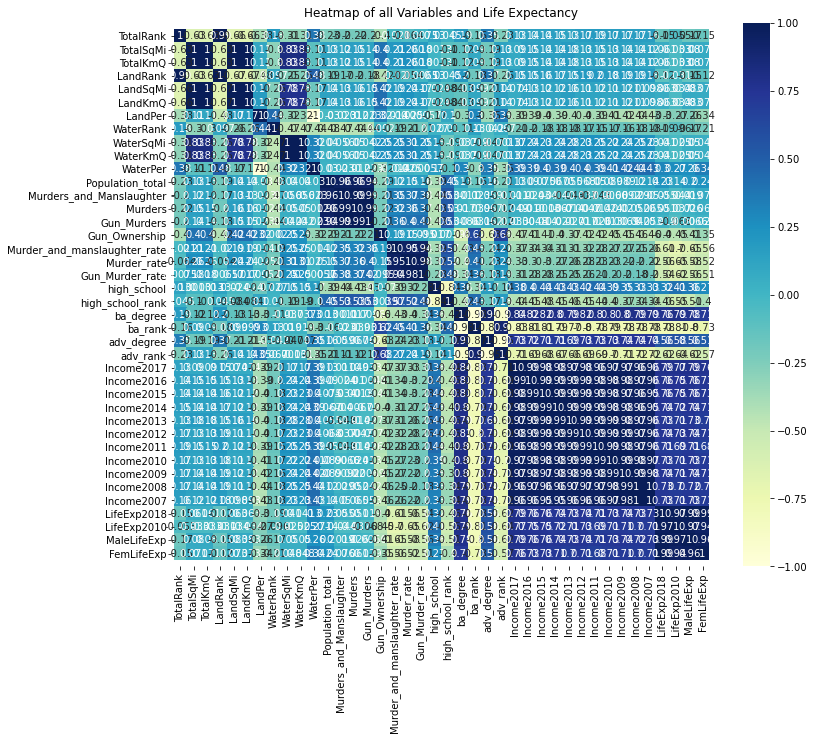

In [22]:
# Heatmap showing all correlations
fig, ax0 = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, ax=ax0, cmap="YlGnBu")
# margins bug
b, t = plt.ylim()
plt.ylim(b + 0.5, t-0.5)
ax0.set_title("Heatmap of all Variables and Life Expectancy")
plt.show()

In [24]:
# order the correlations with LifeExp2018
correlations = corr_matrix["LifeExp2018"].sort_values(ascending = False)
correlations

LifeExp2018                     1.00
MaleLifeExp                     0.99
FemLifeExp                      0.99
LifeExp2010                     0.97
Income2017                      0.79
ba_degree                       0.76
Income2016                      0.76
Income2015                      0.76
Income2012                      0.74
Income2014                      0.74
Income2009                      0.74
Income2007                      0.73
Income2010                      0.73
Income2008                      0.73
Income2013                      0.73
Income2011                      0.71
adv_degree                      0.56
high_school                     0.32
WaterPer                        0.30
Population_total                0.23
LandSqMi                        0.06
LandKmQ                         0.06
TotalSqMi                       0.06
TotalKmQ                        0.06
Murders_and_Manslaughter        0.05
Murders                         0.05
WaterSqMi                       0.04
W

In [29]:
edu_cols = ['high_school', 'high_school_rank',
       'ba_degree', 'ba_rank', 'adv_degree', 'adv_rank',]
murder_cols = ['Murders_and_Manslaughter', 'Murders',
       'Gun_Murders', 'Gun_Ownership', 'Murder_and_manslaughter_rate',
       'Murder_rate', 'Gun_Murder_rate',]
area_cols = ["TotalKmQ","LandKmQ","WaterKmQ"]
income_cols = ['Income2017',
       'Income2016', 'Income2015', 'Income2014', 'Income2013', 'Income2012',
       'Income2011', 'Income2010', 'Income2009', 'Income2008', 'Income2007',
       'LifeExp2018', 'LifeExp2010']

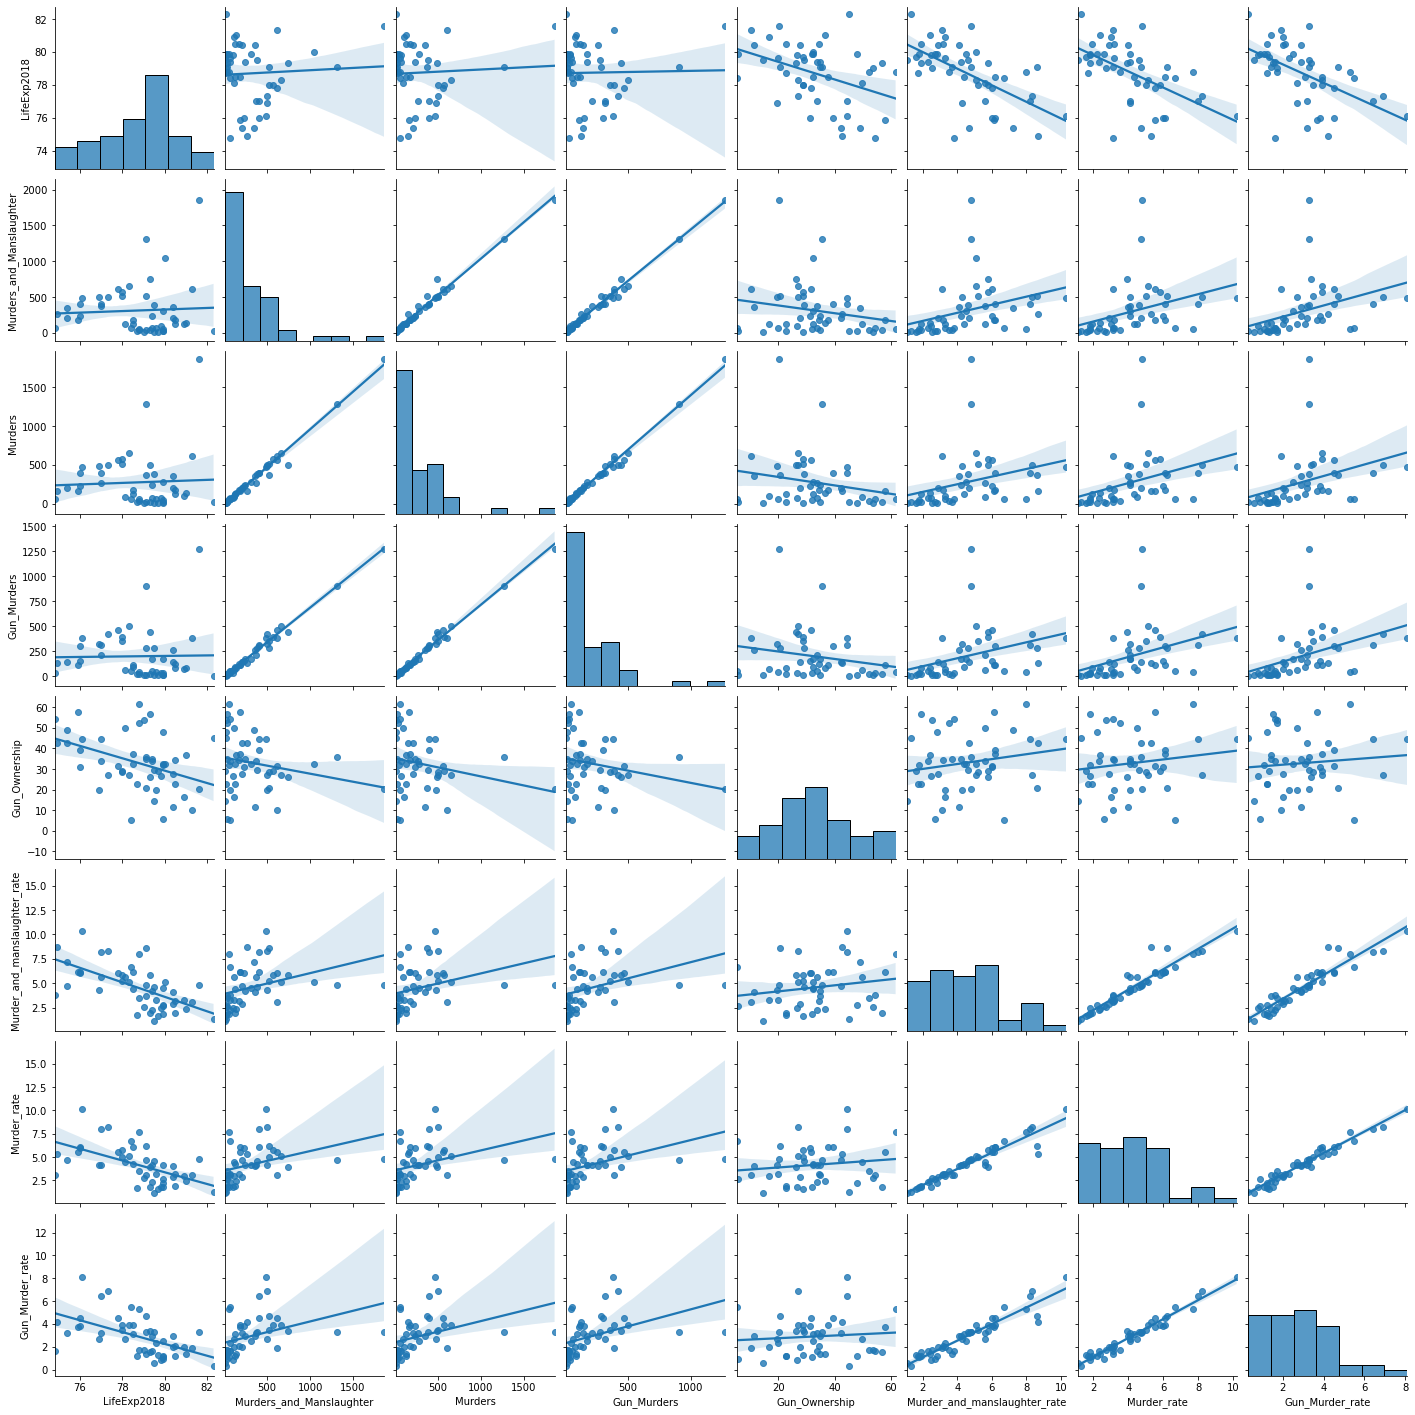

In [30]:
# Life expectancy vs Gun metrics
g = sns.pairplot(total[["LifeExp2018"]+murder_cols], kind = "reg")

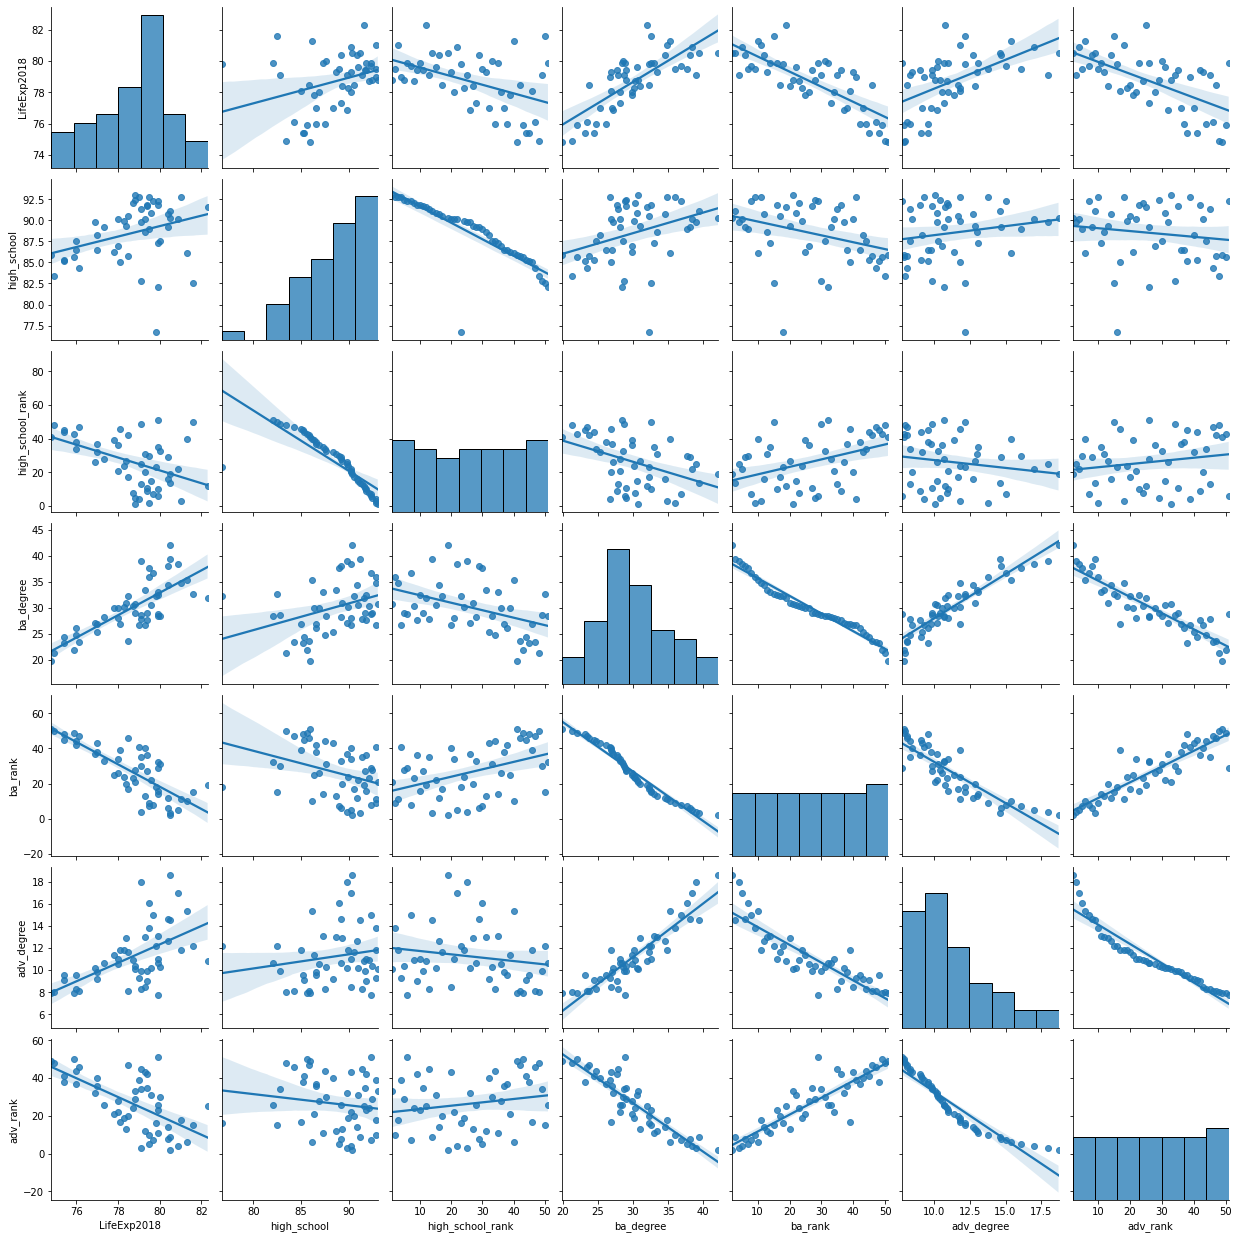

In [36]:
# Life expectancy vs Education metrics
g = sns.pairplot(total[["LifeExp2018"]+edu_cols], kind = "reg")

In [37]:
### Deep-dive into correlations

In [38]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

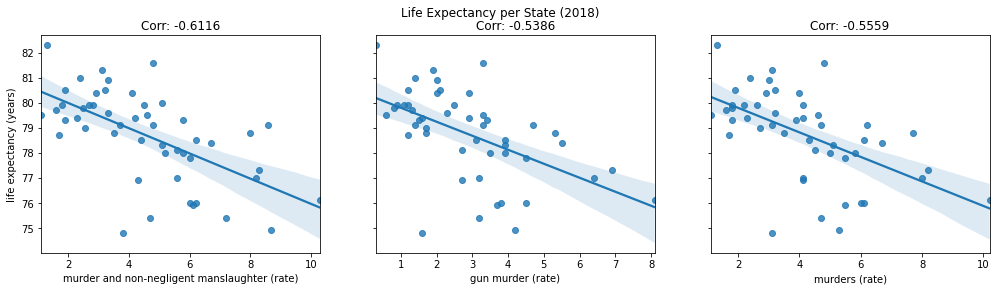

In [42]:
# Regression plots for murder (rates)

corr_MurderNMRate = correlations['Murder_and_manslaughter_rate']
corr_GunMurderRate = correlations['Gun_Murder_rate']
corr_MurderRate = correlations['Murder_rate']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, sharey = True, figsize=(17, 4))

s1 = sns.regplot(x = "Murder_and_manslaughter_rate", y = "LifeExp2018", data=total, ax=ax1)
s1.set_title("Corr: {:.4f}".format(corr_MurderNMRate))
s1.set(xlabel="murder and non-negligent manslaughter (rate)", ylabel="life expectancy (years)")

s2 = sns.regplot(x = "Gun_Murder_rate", y = "LifeExp2018", data=total, ax=ax2)
s2.set_title("Corr: {:.4f}".format(corr_GunMurderRate))
s2.set(xlabel="gun murder (rate)", ylabel="")

s3 = sns.regplot(x = "Murder_rate", y = "LifeExp2018", data=total, ax=ax3)
s3.set_title("Corr: {:.4f}".format(corr_MurderRate))
s3.set(xlabel="murders (rate)", ylabel="")

fig.suptitle("Life Expectancy per State (2018)")
plt.show()

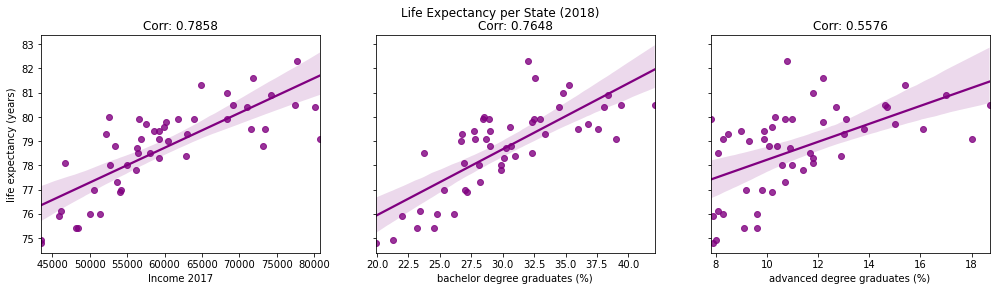

In [44]:
# Regression plots for the education variables

corr_Income = correlations['Income2017']
corr_BADegPer = correlations['ba_degree']
corr_AdvDegPer = correlations['adv_degree']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, sharey = True, figsize=(17, 4))
# Income in 2017
s1 = sns.regplot(x = "Income2017", y = "LifeExp2018", color="Purple",data=total, ax=ax1)
s1.set(title ="Corr: {:.4f}".format(corr_Income), xlabel="Income 2017", ylabel="life expectancy (years)")
# Bachelor degree
s2 = sns.regplot(x = "ba_degree", y = "LifeExp2018", color="Purple", data=total, ax=ax2)
s2.set(title ="Corr: {:.4f}".format(corr_BADegPer), xlabel="bachelor degree graduates (%)", ylabel="")
# Advanced degree
s3 = sns.regplot(x = "adv_degree", y = "LifeExp2018", color= "Purple", data=total, ax=ax3)
s3.set(title = "Corr: {:.4f}".format(corr_AdvDegPer) , xlabel="advanced degree graduates (%)", ylabel="")

fig.suptitle("Life Expectancy per State (2018)")

plt.show()

### 3. Data Exploration: visualizing three variables in 2D

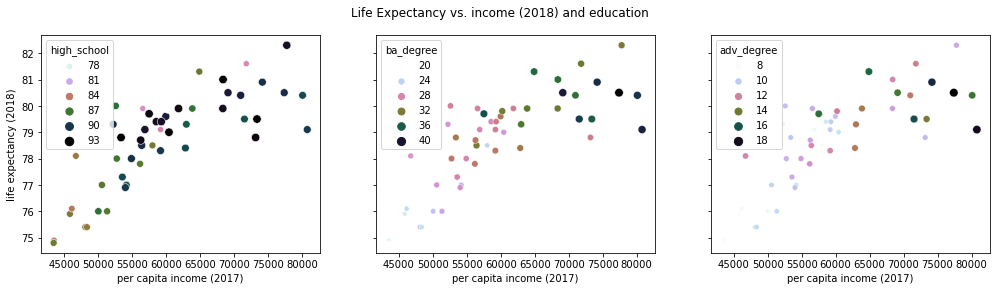

In [47]:
# Scatterplots of life expectancy vs. income (2017) and education
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, sharey = True, figsize=(17, 4))

sns.scatterplot(y="LifeExp2018",x="Income2017", size="high_school", hue="high_school", palette="cubehelix_r",  data = total, ax=ax1)
ax1.set(xlabel = "per capita income (2017)", ylabel="life expectancy (2018)")

sns.scatterplot(y="LifeExp2018",x="Income2017", size="ba_degree", hue="ba_degree", palette="cubehelix_r" , data = total, ax=ax2)
ax2.set(xlabel = "per capita income (2017)", ylabel="")

sns.scatterplot(y="LifeExp2018",x="Income2017", size="adv_degree", hue="adv_degree", palette="cubehelix_r" ,  data = total, ax=ax3)
ax3.set(xlabel = "per capita income (2017)", ylabel="")
fig.suptitle("Life Expectancy vs. income (2018) and education")

plt.show()

How does the level of education in the different states relate to life expectancy and income? = both ba and advanced degree percentages increase with increases in income and life expectancy

### 4. Data Selection

In [51]:
selected_cols = ['high_school','ba_degree','adv_degree','LifeExp2018','MaleLifeExp','FemLifeExp', 'Murders_and_Manslaughter', 'Murders',
       'Gun_Murders', 'Gun_Ownership', 'Murder_and_manslaughter_rate',
       'Murder_rate', 'Gun_Murder_rate',  'Population_total', 'TotalKmQ', 'LandKmQ','WaterKmQ','Income2017','Abb','Region','Division']
state_data = total[selected_cols].copy()
state_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   high_school                   50 non-null     float64 
 1   ba_degree                     50 non-null     float64 
 2   adv_degree                    50 non-null     float64 
 3   LifeExp2018                   50 non-null     float64 
 4   MaleLifeExp                   50 non-null     float64 
 5   FemLifeExp                    50 non-null     float64 
 6   Murders_and_Manslaughter      50 non-null     int64   
 7   Murders                       48 non-null     float64 
 8   Gun_Murders                   48 non-null     float64 
 9   Gun_Ownership                 50 non-null     float64 
 10  Murder_and_manslaughter_rate  50 non-null     float64 
 11  Murder_rate                   48 non-null     float64 
 12  Gun_Murder_rate               48 non-null     

In [52]:
state_data.head()

,high_school,ba_degree,adv_degree,LifeExp2018,MaleLifeExp,FemLifeExp,Murders_and_Manslaughter,Murders,Gun_Murders,Gun_Ownership,...,Murder_rate,Gun_Murder_rate,Population_total,TotalKmQ,LandKmQ,WaterKmQ,Income2017,Abb,Region,Division
State,,,,,,,,,,,,,,,,,,,,,
Alabama,85.30,24.50,9.10,75.40,72.60,78.10,348,NaN,NaN,48.90,...,NaN,NaN,4853875,135767,131171,4597,48123,AL,South,East South Central
Alaska,92.40,29.00,10.40,78.80,76.70,81.20,59,57.00,39.00,61.70,...,7.70,5.30,737709,1723337,1477953,245384,73181,AK,West,Pacific
Arizona,82.10,28.40,10.70,79.90,77.50,82.30,306,278.00,171.00,32.30,...,4.10,2.50,6817565,295234,294207,1026,56581,AZ,West,Mountain
Arkansas,85.60,22.00,7.90,75.90,73.10,78.60,181,164.00,110.00,57.90,...,5.50,3.70,2977853,137732,134771,2961,45869,AR,South,West South Central
California,82.50,32.60,12.20,81.60,79.40,83.80,1861,1861.00,1275.00,20.10,...,4.80,3.30,38993940,423967,403466,20501,71805,CA,West,Pacific


In [53]:
state_data.to_csv('output.csv')